# Case Study : Dataset consisting of annual customer data for a wholesale distributor.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [2]:
# Importing the dataset
data = pd.read_csv('Wholesale customers data.csv')
data.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

Attribute Information:

1) FRESH: annual spending (m.u.) on fresh products (Continuous);

2) MILK: annual spending (m.u.) on milk products (Continuous);

3) GROCERY: annual spending (m.u.)on grocery products (Continuous);

4) FROZEN: annual spending (m.u.)on frozen products (Continuous)

5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)

6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);

7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)

8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)
Descriptive Statistics:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
data.describe()

Channel      Region  ...  Detergents_Paper    Delicassen
count  440.000000  440.000000  ...        440.000000    440.000000
mean     1.322727    2.543182  ...       2881.493182   1524.870455
std      0.468052    0.774272  ...       4767.854448   2820.105937
min      1.000000    1.000000  ...          3.000000      3.000000
25%      1.000000    2.000000  ...        256.750000    408.250000
50%      1.000000    3.000000  ...        816.500000    965.500000
75%      2.000000    3.000000  ...       3922.000000   1820.250000
max      2.000000    3.000000  ...      40827.000000  47943.000000

[8 rows x 8 columns]

Most of the data in this dataset is continuous in nature except for two features: Channel and Region. So for easing your computations, you will drop these two features.

In [3]:
data.drop(["Channel", "Region"], axis = 1, inplace = True)

##  Our aim is to make clusters from this data that can segment similar clients together.


### 1. Hierarchical Clustering

In [6]:
data_scaled = normalize(data) # It gives good results for this normalization
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.708333  0.539874  0.422741  0.011965          0.149505    0.074809
1  0.442198  0.614704  0.599540  0.110409          0.206342    0.111286
2  0.396552  0.549792  0.479632  0.150119          0.219467    0.489619
3  0.856837  0.077254  0.272650  0.413659          0.032749    0.115494
4  0.895416  0.214203  0.284997  0.155010          0.070358    0.205294

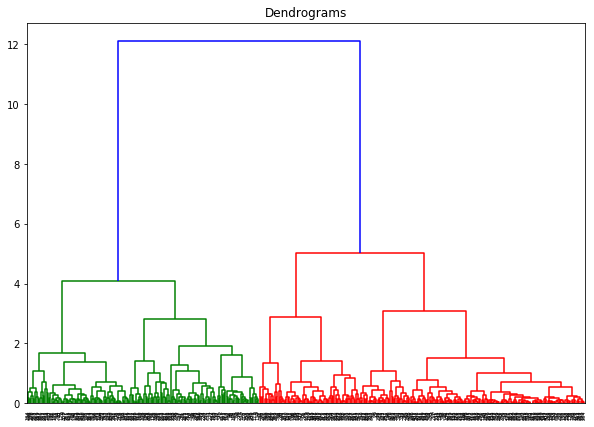

In [7]:
# Using the dendrogram to find the optimal number of clusters. Dendogram works as memory capturing measure of 
# dissimilarity between clusters.
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

**For Threshold in dendogram we consider the longest vertical line that doesn't cross any extended horizontal line. Here following this process, it gives us 2 clusters.**

In [8]:
# Fitting Hierarchical Clustering to the dataset, using euclidean distance linkage 
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

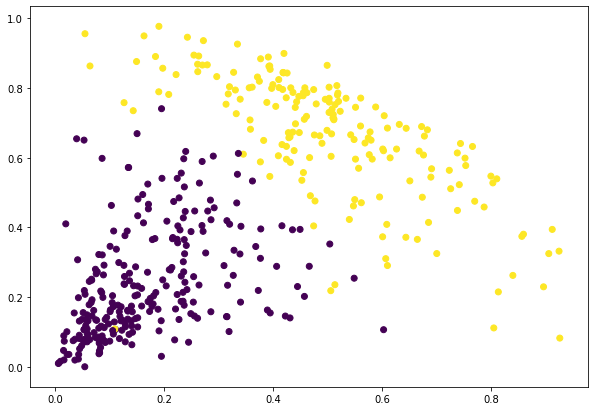

In [9]:
#Visualising the clusters
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_)

### 2. Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

In [4]:
data_scaled = StandardScaler().fit_transform(data) # performs better for standardized dataset
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

/home/teddy/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/teddy/.local/lib/python3.5/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.052933  0.523568 -0.041115 -0.589367         -0.043569   -0.066339
1 -0.391302  0.544458  0.170318 -0.270136          0.086407    0.089151
2 -0.447029  0.408538 -0.028157 -0.137536          0.133232    2.243293
3  0.100111 -0.624020 -0.392977  0.687144         -0.498588    0.093411
4  0.840239 -0.052396 -0.079356  0.173859         -0.231918    1.299347

In [5]:
## We will construct a DBSCAN object that requires a minimum of 15 data points 
## in a neighborhood of radius 0.5 to be considered a core point.
db = DBSCAN(eps = .7, min_samples = 15).fit(data_scaled)
print(db.labels_)

[ 0  0 -1  0 -1  0  0  0  0 -1 -1  0 -1 -1 -1  0  0 -1  0  0  0  0 -1 -1
 -1  0  0  0 -1 -1  0  0  0 -1  0  0 -1 -1 -1 -1 -1  0 -1 -1  0 -1 -1 -1
  0 -1  0  0 -1  0  0  0 -1  0  0  0  0 -1  0 -1  0 -1  0 -1 -1  0  0 -1
  0 -1  0  0  0 -1  0  0  0  0  0  0  0 -1 -1 -1  0  0  0  0 -1 -1  0  0
  0  0  0  0 -1  0  0 -1  0  0  0 -1  0 -1  0 -1  0  0  0  0  0  0  0  0
  0  0  0 -1 -1 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0
  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0 -1  0  0
  0  0  0 -1  0 -1  0  0 -1  0  0  0  0 -1  0 -1  0  0  0 -1  0  0 -1  0
  0 -1  0  0 -1  0  0  0 -1 -1 -1  0  0 -1  0  0  0 -1  0 -1  0  0  0  0
 -1  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1
 -1  0  0  0  0  0  0  0  0  0  0 -1  0 -1 -1  0  0  0 -1 -1  0  0  0  0
  0 -1 -1 -1 -1  0  0  0  0 -1  0  0 -1 -1  0  0  0  0 -1 -1 -1 -1  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1 -1 -1 -1  0  0 -1 -1 -1
 -1  0  0 -1  0  0  0 -1  0  0  0  0  0 -1  0  0  0

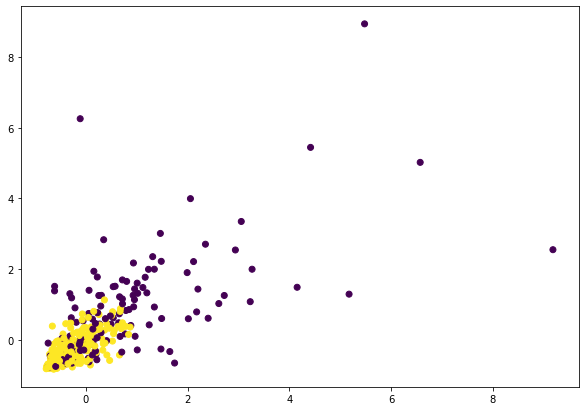

In [16]:
#Visualising the clusters
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=db.labels_)